In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.animation

/Users/adamhuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/adamhuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/adamhuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/adamhuang/anaconda3/lib/python3.6/site-packages/tensorflow/pyth

In [2]:
import model
import utilities as ut

In [3]:
final_tab = pd.read_csv("final_table.csv")

In [4]:
final_tab

,Unnamed: 0,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,Med Status,QC_Athena,QC_NIAK
0,776,1038415,1,1.0,14.92,1,3,ODD,1.0,52.0,34.0,18.0,3.0,109.0,103.0,-999.0,107.0,1.0,0.0,0.0
1,777,1201251,1,1.0,12.33,1,3,NaN,1.0,49.0,28.0,21.0,3.0,115.0,103.0,-999.0,110.0,2.0,1.0,1.0
2,778,1245758,1,0.0,8.58,1,0,NaN,1.0,35.0,20.0,15.0,3.0,121.0,88.0,-999.0,106.0,1.0,1.0,1.0
3,779,1253411,1,1.0,8.08,1,0,NaN,1.0,35.0,19.0,16.0,3.0,119.0,106.0,-999.0,114.0,1.0,1.0,1.0
4,780,1419103,1,0.0,9.92,1,0,NaN,1.0,41.0,22.0,19.0,3.0,124.0,76.0,-999.0,102.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,959,23038,6,1.0,9.33,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,124.0,NaN,1.0,1.0
121,960,23039,6,1.0,11.17,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,114.0,NaN,1.0,1.0
122,961,23040,6,0.0,7.50,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,126.0,NaN,1.0,1.0
123,962,23041,6,0.0,9.92,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,128.5,NaN,1.0,1.0


In [5]:
beijing_subjects = os.listdir('fmri')

In [6]:
beijing_subjects.remove('.DS_Store')

In [7]:
ohsu_subjects = os.listdir('../ohsu_test_output_nifty/fmri')

In [8]:
nyu_subjects = os.listdir('../nyu_test_output_nifty/fmri_nyu_test')

In [9]:
data_beijing = []
for filename in beijing_subjects:
    data_beijing.append(ut.img_get_data('fmri/' + filename))
data_beijing = np.array(data_beijing)

In [10]:
data_beijing.shape

(50, 53, 64, 46, 231)

In [11]:
data_ohsu = []
for filename in ohsu_subjects:
    data_ohsu.append(ut.img_get_data('../ohsu_test_output_nifty/fmri/' + filename))
data_ohsu = np.array(data_ohsu)

In [12]:
data_ohsu.shape

(34, 53, 64, 46, 73)

In [13]:
data_nyu = []
for filename in nyu_subjects:
    data_nyu.append(ut.img_get_data('../nyu_test_output_nifty/fmri_nyu_test/' + filename))
data_nyu = np.array(data_nyu)

In [14]:
var = ut.variance(data_beijing[0])

In [15]:
var.shape

(53, 64, 46)

In [16]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5, 0.98, 'Averaged Image for FMRI')

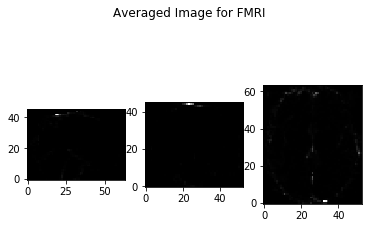

In [17]:
slice_0 = var[26, :, :]
slice_1 = var[:, 30, :]
slice_2 = var[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Averaged Image for FMRI")

In [18]:
variance_beijing = []
for subject in data_beijing:
    variance_beijing.append(ut.variance(subject))
variance_beijing = np.array(variance_beijing)

In [19]:
variance_ohsu = []
for subject in data_ohsu:
    variance_ohsu.append(ut.variance(subject))
variance_ohsu = np.array(variance_ohsu)

In [20]:
variance_nyu = []
for subject in data_nyu:
    variance_nyu.append(ut.variance(subject))
variance_nyu = np.array(variance_nyu)

In [21]:
variance_beijing.shape

(50, 53, 64, 46)

In [22]:
variance_ohsu.shape

(34, 53, 64, 46)

In [23]:
variance_nyu.shape

(41, 53, 64, 46)

In [24]:
variance_total = np.append(variance_beijing, variance_nyu, axis = 0)
variance_total = np.append(variance_total, variance_ohsu, axis = 0)

In [25]:
variance_total.shape

(125, 53, 64, 46)

In [26]:
from scipy.stats import entropy

In [27]:
DX_0_tab = final_tab[final_tab["DX"] == 0]

In [28]:
DX_0_tab

,Unnamed: 0,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,Med Status,QC_Athena,QC_NIAK
2,778,1245758,1,0.0,8.58,1,0,NaN,1.0,35.0,20.0,15.0,3.0,121.0,88.0,-999.0,106.0,1.0,1.0,1.0
3,779,1253411,1,1.0,8.08,1,0,NaN,1.0,35.0,19.0,16.0,3.0,119.0,106.0,-999.0,114.0,1.0,1.0,1.0
4,780,1419103,1,0.0,9.92,1,0,NaN,1.0,41.0,22.0,19.0,3.0,124.0,76.0,-999.0,102.0,1.0,1.0,1.0
5,781,1517058,1,1.0,9.75,1,0,NaN,1.0,36.0,20.0,16.0,3.0,141.0,138.0,-999.0,144.0,1.0,1.0,1.0
6,782,1581470,1,1.0,8.83,1,0,NaN,1.0,41.0,26.0,15.0,3.0,111.0,123.0,-999.0,118.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,959,23038,6,1.0,9.33,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,124.0,NaN,1.0,1.0
121,960,23039,6,1.0,11.17,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,114.0,NaN,1.0,1.0
122,961,23040,6,0.0,7.50,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,126.0,NaN,1.0,1.0
123,962,23041,6,0.0,9.92,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,128.5,NaN,1.0,1.0


In [29]:
DX_1_tab = final_tab[final_tab["DX"] == 1]

In [30]:
DX_1_tab

,Unnamed: 0,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,Med Status,QC_Athena,QC_NIAK
13,789,2024999,1,1.0,10.33,1,1,ODD,1.0,49.0,31.0,18.0,3.0,117.0,98.0,-999.0,109.0,1.0,1.0,1.0
27,803,2599965,1,1.0,14.00,1,1,ODD,1.0,55.0,26.0,29.0,3.0,101.0,94.0,-999.0,98.0,1.0,1.0,1.0
31,807,3124419,1,1.0,8.75,1,1,NaN,1.0,46.0,24.0,22.0,3.0,128.0,85.0,-999.0,109.0,1.0,1.0,1.0
33,809,3313497,1,1.0,9.33,1,1,TS,1.0,52.0,28.0,24.0,3.0,111.0,109.0,-999.0,111.0,2.0,1.0,1.0
36,812,3378296,1,1.0,9.83,1,1,ODD,1.0,59.0,28.0,31.0,3.0,141.0,112.0,-999.0,131.0,2.0,1.0,1.0
39,815,3520880,1,1.0,9.83,1,1,NaN,1.0,54.0,29.0,25.0,3.0,140.0,135.0,-999.0,142.0,1.0,1.0,1.0
43,819,3834703,1,1.0,12.92,1,1,NaN,1.0,42.0,24.0,18.0,3.0,112.0,101.0,-999.0,108.0,1.0,1.0,1.0
46,822,7591533,1,1.0,12.42,1,1,ODD,1.0,56.0,34.0,22.0,3.0,97.0,76.0,-999.0,86.0,1.0,1.0,1.0
49,826,9744150,1,1.0,9.50,1,1,NaN,1.0,50.0,27.0,23.0,3.0,117.0,104.0,-999.0,113.0,1.0,1.0,1.0
50,889,21002,5,1.0,11.72,1,1,NaN,NaN,70.0,70.0,56.0,2.0,105.0,89.0,NaN,97.0,NaN,1.0,1.0


In [31]:
DX_3_tab = final_tab[final_tab["DX"] == 3]

In [32]:
DX_3_tab

,Unnamed: 0,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,Med Status,QC_Athena,QC_NIAK
0,776,1038415,1,1.0,14.92,1,3,ODD,1.0,52.0,34.0,18.0,3.0,109.0,103.0,-999.0,107.0,1.0,0.0,0.0
1,777,1201251,1,1.0,12.33,1,3,NaN,1.0,49.0,28.0,21.0,3.0,115.0,103.0,-999.0,110.0,2.0,1.0,1.0
7,783,1784368,1,1.0,8.92,1,3,NaN,1.0,36.0,20.0,16.0,3.0,136.0,89.0,-999.0,116.0,1.0,1.0,1.0
10,786,1883688,1,0.0,9.08,1,3,NaN,1.0,45.0,10.0,35.0,3.0,112.0,83.0,-999.0,98.0,1.0,0.0,1.0
18,794,2380326,1,0.0,9.58,1,3,TS,1.0,39.5,25.5,14.0,3.0,103.0,100.0,-999.0,102.0,1.0,1.0,1.0
19,795,2380967,1,1.0,10.00,1,3,NaN,1.0,47.0,31.0,16.0,3.0,109.0,115.0,-999.0,113.0,1.0,1.0,1.0
23,799,2505328,1,0.0,8.83,1,3,NaN,1.0,41.0,32.0,9.0,3.0,83.0,85.0,-999.0,82.0,1.0,1.0,1.0
28,804,2628237,1,0.0,13.00,1,3,ODD,1.0,57.0,33.0,24.0,3.0,90.0,106.0,-999.0,97.0,1.0,1.0,1.0
32,808,3169448,1,1.0,11.00,1,3,NaN,1.0,44.0,23.0,21.0,3.0,104.0,111.0,-999.0,108.0,1.0,1.0,1.0
37,813,3407871,1,1.0,13.33,1,3,NaN,1.0,38.0,24.0,14.0,3.0,100.0,98.0,-999.0,99.0,1.0,1.0,1.0


In [33]:
img_DX_0 = [variance_total[i][:][:][:] for i in DX_0_tab.index]

In [34]:
img_DX_0 = np.array(img_DX_0)

In [35]:
img_DX_0.shape

(67, 53, 64, 46)

In [36]:
img_DX_1 = [variance_total[i][:][:][:] for i in DX_1_tab.index]
img_DX_1 = np.array(img_DX_1)

In [37]:
img_DX_1.shape

(35, 53, 64, 46)

In [38]:
img_DX_3 = [variance_total[i][:][:][:] for i in DX_3_tab.index]
img_DX_3 = np.array(img_DX_3)

In [39]:
img_DX_3.shape

(21, 53, 64, 46)

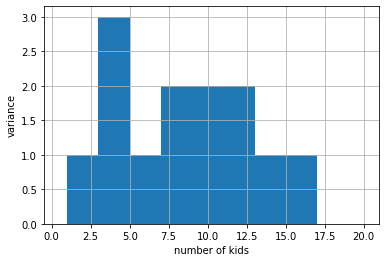

In [64]:
plt.hist(img_DX_1[:,0,0,1], range = (0,20), bins = [0.5,1,3,5,7,9,13,17,20])
plt.xlabel("number of kids")
plt.ylabel("variance")
plt.grid()

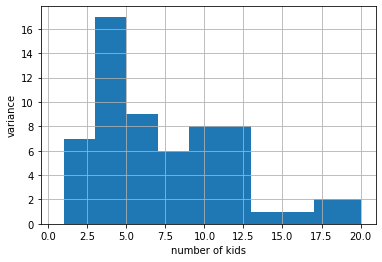

In [65]:
plt.hist(img_DX_0[:,0,0,1], range = (0,20), bins = [0.5,1,3,5,7,9,13,17,20])
plt.xlabel("number of kids")
plt.ylabel("variance")
plt.grid()

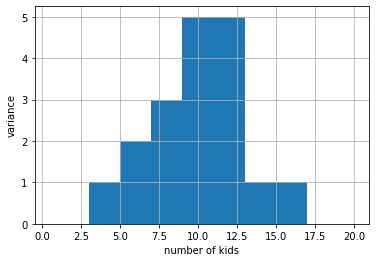

In [66]:
plt.hist(img_DX_3[:,0,0,1], range = (0,20), bins = [0.5,1,3,5,7,9,13,17,20])
plt.xlabel("number of kids")
plt.ylabel("variance")
plt.grid()

In [43]:
def kl_divergence(s1, s2):
    shape = s1.shape
    kl_matrix = np.zeros((shape[1], shape[2], shape[3]))
    for i in range(shape[1]):
        for j in range(shape[2]):
            for k in range(shape[3]):
                s1_pixel = s1[:,i,j,k]
                s2_pixel = s2[:,i,j,k]
                s1_hist = np.histogram(s1_pixel, bins = [0,0.5,1,3,5,7,9,13,17,20], range = (0, 20))
                s2_hist = np.histogram(s2_pixel, bins = [0,0.5,1,3,5,7,9,13,17,20], range = (0, 20))
                kl = entropy(s1_hist[0], s2_hist[0])
                kl_matrix[i,j,k] = kl
    return kl_matrix

In [44]:
kl_matrix_01 = kl_divergence(img_DX_1, img_DX_0)

Text(0.5, 0.98, 'Averaged Image for FMRI')

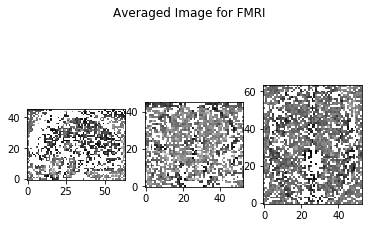

In [45]:
slice_0 = kl_matrix_01[26, :, :]
slice_1 = kl_matrix_01[:, 30, :]
slice_2 = kl_matrix_01[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Averaged Image for FMRI")

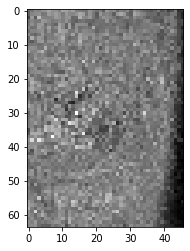

In [46]:
def animate(i):
    ax.imshow(kl_matrix_01[i, :, :], cmap = 'gray')
fig, ax = plt.subplots()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=53)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [47]:
kl_matrix_03 = kl_divergence(img_DX_3, img_DX_0)

Text(0.5, 0.98, 'Averaged Image for FMRI')

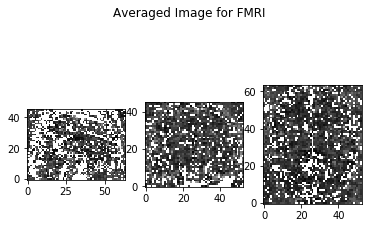

In [48]:
slice_0 = kl_matrix_03[26, :, :]
slice_1 = kl_matrix_03[:, 30, :]
slice_2 = kl_matrix_03[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Averaged Image for FMRI")

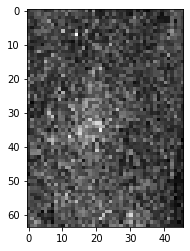

In [49]:
def animate(i):
    ax.imshow(kl_matrix_03[i, :, :], cmap = 'gray')
fig, ax = plt.subplots()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=53)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [50]:
kl_list_01 = []
kl_pos_list_01 = []
shape = kl_matrix_01.shape
for i in range(shape[0]):
    for j in range(shape[1]):
        for k in range(shape[2]):
            kl_list_01.append(kl_matrix_01[i,j,k])
            kl_pos_list_01.append((i,j,k))

In [51]:
kl_result_01 = pd.DataFrame({"position": kl_pos_list_01, "kl divergence": kl_list_01})

In [52]:
kl_result_01

,position,kl divergence
0,"(0, 0, 0)",0.521351
1,"(0, 0, 1)",0.591910
2,"(0, 0, 2)",0.687945
3,"(0, 0, 3)",0.655064
4,"(0, 0, 4)",inf
...,...,...
156027,"(52, 63, 41)",0.283409
156028,"(52, 63, 42)",0.238690
156029,"(52, 63, 43)",inf
156030,"(52, 63, 44)",0.082577


In [53]:
kl_result_01_final = kl_result_01[kl_result_01["kl divergence"] != np.inf]

In [54]:
kl_result_01_final

,position,kl divergence
0,"(0, 0, 0)",0.521351
1,"(0, 0, 1)",0.591910
2,"(0, 0, 2)",0.687945
3,"(0, 0, 3)",0.655064
5,"(0, 0, 5)",0.738600
...,...,...
156026,"(52, 63, 40)",0.392111
156027,"(52, 63, 41)",0.283409
156028,"(52, 63, 42)",0.238690
156030,"(52, 63, 44)",0.082577


In [55]:
kl_result_01_final = kl_result_01_final.sort_values(by = ["kl divergence"], ascending = False)

In [56]:
top_positions_01 = np.array(kl_result_01_final["position"])[:1000]

In [57]:
kl_list_03 = []
kl_pos_list_03 = []
shape = kl_matrix_03.shape
for i in range(shape[0]):
    for j in range(shape[1]):
        for k in range(shape[2]):
            kl_list_03.append(kl_matrix_03[i,j,k])
            kl_pos_list_03.append((i,j,k))

In [58]:
kl_result_03 = pd.DataFrame({"position": kl_pos_list_03, "kl divergence": kl_list_03})
kl_result_03_final = kl_result_03[kl_result_03["kl divergence"] != np.inf]
kl_result_03_final = kl_result_03_final.sort_values(by = ["kl divergence"], ascending = False)
top_positions_03 = np.array(kl_result_03_final["position"])[:1000]

In [59]:
all_positions_01 = np.array(kl_result_01_final["position"])
all_positions_03 = np.array(kl_result_03_final["position"])
all_kl_01 = np.array(kl_result_01_final["kl divergence"])
all_kl_03 = np.array(kl_result_03_final["kl divergence"])

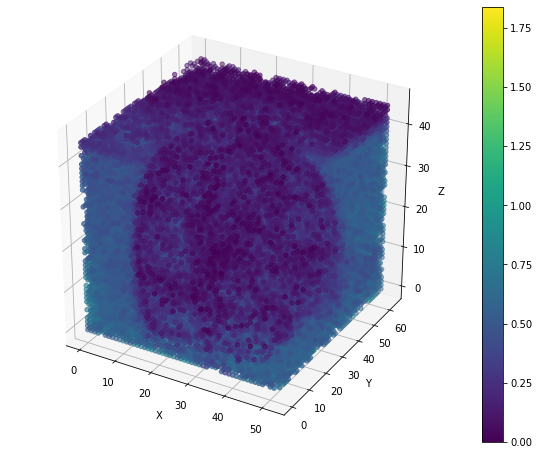

In [67]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

x = [all_positions_01[i][0] for i in range(len(all_positions_01))]
y = [all_positions_01[i][1] for i in range(len(all_positions_01))]
z = [all_positions_01[i][2] for i in range(len(all_positions_01))]

sc = ax.scatter(x, y, z, c = all_kl_01, marker='o')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.colorbar(sc)
plt.show()

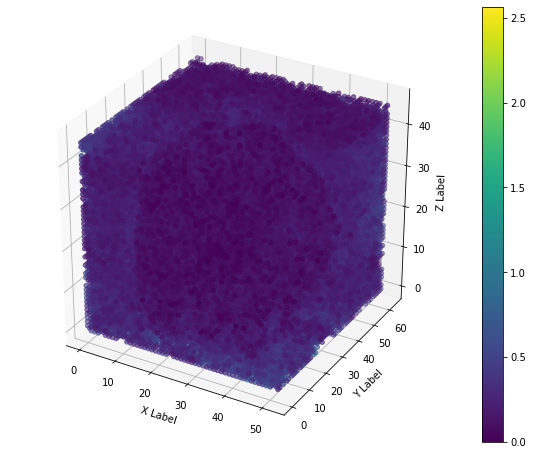

In [61]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

x = [all_positions_03[i][0] for i in range(len(all_positions_03))]
y = [all_positions_03[i][1] for i in range(len(all_positions_03))]
z = [all_positions_03[i][2] for i in range(len(all_positions_03))]

sc = ax.scatter(x, y, z, c = all_kl_03, marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.colorbar(sc)
plt.show()

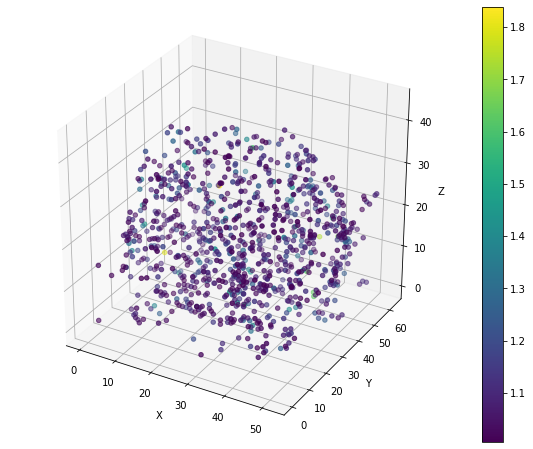

In [68]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

x = [top_positions_01[i][0] for i in range(len(top_positions_01))]
y = [top_positions_01[i][1] for i in range(len(top_positions_01))]
z = [top_positions_01[i][2] for i in range(len(top_positions_01))]

sc = ax.scatter(x, y, z, c = all_kl_01[:1000], marker='o')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.colorbar(sc)
plt.show()

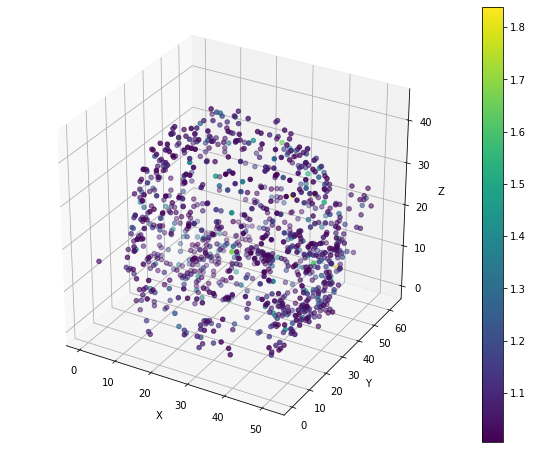

In [69]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

x = [top_positions_03[i][0] for i in range(len(top_positions_03))]
y = [top_positions_03[i][1] for i in range(len(top_positions_03))]
z = [top_positions_03[i][2] for i in range(len(top_positions_03))]

sc = ax.scatter(x, y, z, c = all_kl_01[:1000], marker='o')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.colorbar(sc)
plt.show()